<a href="https://colab.research.google.com/github/VinciGit00/Arduino/blob/main/NeuralNetwork/Keras_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
mnist = tf.keras.datasets.mnist #28x28 images with hand written digits from 0 to 9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


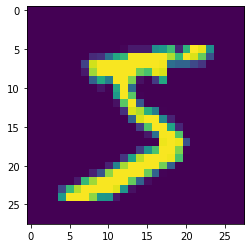

In [3]:
plt.imshow(x_train[0])

In [4]:
#Otherwise with only 0 and 1s
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


# Creation of the model

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
#Output layer
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))

model.compile(optimizer = "adam", 
              loss= "sparse_categorical_crossentropy" , 
              metrics= ['accuracy'] )

In [6]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch%100 ==0 :print('')
    print('.', end='')

In [7]:
#Early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights = True)

mfit = model.fit(x_train, y_train, epochs = 10,validation_split = 0.2,
           verbose = 0, callbacks=[PrintDot(), early_stopping])


..........

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 128)                 100480    
                                                                 
 dense_1 (Dense)             (32, 128)                 16512     
                                                                 
 dense_2 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [9]:
vall_loss, vall_acc = model.evaluate(x_test, y_test)
print(vall_loss, vall_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1583 - accuracy: 0.9623
0.1582913100719452 0.9623000025749207


Text(0, 0.5, 'Cost function')

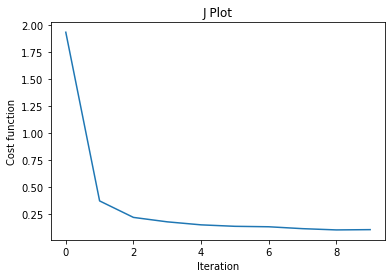

In [10]:
import matplotlib.pyplot as plt
J = mfit.history['loss']
plt.plot(J)
plt.title("J Plot")
plt.xlabel("Iteration")
plt.ylabel("Cost function")


### Plot the loss functions

In [11]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Cost function')
  plt.legend()
  plt.grid(True)

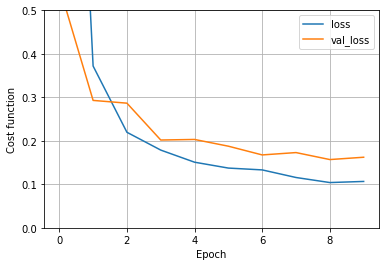

In [12]:
plot_loss(mfit)


## Print the model

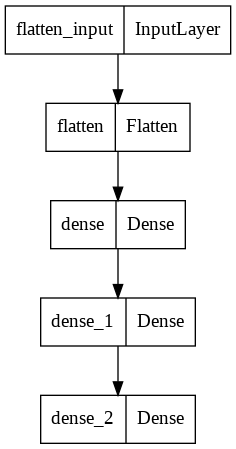

In [14]:
#fit the model
plot_model(model)